In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
NTC10K_RES = np.array([1214600, 844390, 592430, 419380, 299480,
                       215670, 156410, 114660, 84510, 62927,
                       47077, 35563, 27119, 20860, 16204,
                       12683, 10000, 7942, 6327, 5074,
                       4103, 3336, 2724, 2237, 1846,
                       1530, 1275, 1068, 899.3, 760.7,
                       645.2, 549.4, 470.0, 403.6, 347.4,
                       300.1, 260.1],
                      dtype=np.float64)

NTC10K_TEMP = np.array([-55, -50, -45, -40, -35,
                        -30, -25, -20, -15, -10,
                        -5, 0, 5, 10, 15,
                        20, 25, 30, 35, 40,
                        45, 50, 55, 60, 65,
                        70, 75, 80, 85, 90,
                        95, 100, 105, 110, 115,
                        120, 125],
                       dtype=np.float64)

In [3]:
# Example 4.1.2
def func(x, a, b, c):
    return a / (x - b) + c


# Example 4.1.3
# def func(x, a, b, c):
#     return a * np.log(x - b) + c


# Exercise E4.1
# def func(x, a, b, c):
#     return a / ((x - b)**0.2) + c


# Exercise E4.2
# def func(x, a, b, c, d, e):
#     return a / ((x - b)**0.2) + c * np.log(x - d) + e

In [4]:
popt, pcov = curve_fit(func, NTC10K_RES, NTC10K_TEMP)

max_error = np.max(np.abs(func(NTC10K_RES, *popt) - NTC10K_TEMP))
rms_error = np.sqrt(np.sum(np.power(func(NTC10K_RES, *popt) - NTC10K_TEMP, 2)) / NTC10K_RES.shape[0])

print(f'Regression coefficients: {popt}')
print(f'Max error: {max_error:.3f}')
print(f'Quadratic mean error: {rms_error:.3f}')

Regression coefficients: [ 7.90273284e+05 -5.42584603e+03 -3.25189720e+01]
Max error: 23.129
Quadratic mean error: 10.245


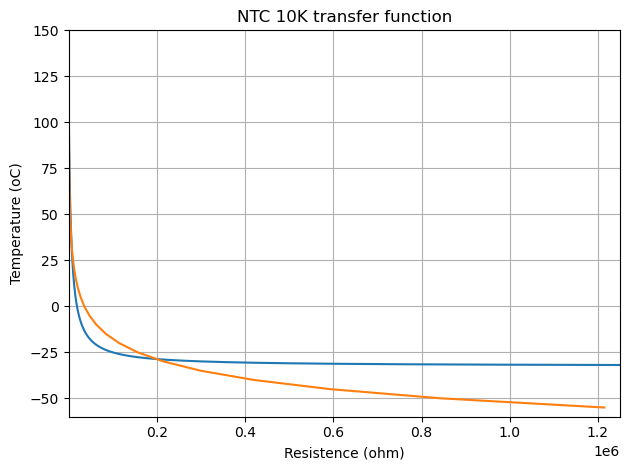

In [5]:
x = np.linspace(1, 1250000, 1000)
y = func(x, *popt)

plt.plot(x, y)
plt.plot(NTC10K_RES, NTC10K_TEMP)
plt.title('NTC 10K transfer function')
plt.xlabel('Resistence (ohm)')
plt.ylabel('Temperature (oC)')
plt.grid()
plt.xlim([1, 1250000])
plt.ylim([-60, 150])
plt.tight_layout()
plt.show()